# **Modelling**

### XGBoost
---

In [150]:
# Set Working Directory 
import os 
os.chdir("/home/nico/BMIDS_FP")
os.getcwd()

'/home/nico/BMIDS_FP'

In [151]:
# Import XGBoost
import xgboost as xgb
print(xgb.__version__)

2.1.2


In [152]:
# Import relevant pacakges
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [153]:
# Import final csv
df = pd.read_csv("CA_DF.csv")
df

,stay_id,COPD,Hypertension,Diabetes_Mellitus,hospital_expire_flag,gender,age,sapsii,gcs,sofa_24hours,...,Non Invasive Blood Pressure systolic,Non_Invasive_Blood_Pressure_diastolic,Hematocrit,Platelet_Count,Glucose,Potassium,Chloride,Sodium,Creatinine,White_Blood_Cells
0,34100191.0,0.0,0.0,0.0,0,M,47.149517,61,15.0,2.0,...,99.000000,68.000000,37.333333,19.000000,289.666667,4.133333,96.666667,132.000000,7.466667,14.766667
1,38292466.0,0.0,0.0,0.0,0,M,85.259199,43,15.0,0.0,...,91.300000,33.900000,25.450000,147.500000,107.000000,4.733333,92.000000,126.666667,2.166667,23.250000
2,38857852.0,0.0,0.0,0.0,0,F,56.881238,33,15.0,3.0,...,108.538462,62.230769,37.700000,158.000000,330.000000,4.800000,87.000000,131.000000,3.400000,8.600000
3,39625056.0,0.0,0.0,0.0,1,M,78.860531,65,15.0,3.0,...,99.000000,63.000000,32.975000,153.666667,236.250000,4.775000,105.750000,137.500000,1.800000,15.366667
4,37176427.0,0.0,1.0,0.0,0,M,62.709617,28,15.0,2.0,...,103.153846,75.692308,37.500000,191.000000,93.000000,5.100000,84.000000,119.000000,1.700000,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1800,37394079.0,0.0,0.0,0.0,1,M,85.738619,47,14.0,5.0,...,151.647059,83.705882,27.700000,127.000000,234.500000,4.750000,111.500000,144.500000,2.250000,7.000000
1801,31637227.0,0.0,0.0,0.0,0,F,46.213838,41,15.0,2.0,...,105.230769,58.384615,37.100000,58.000000,202.500000,5.800000,113.000000,149.000000,1.450000,10.000000
1802,37748758.0,0.0,0.0,1.0,0,F,69.708486,49,15.0,3.0,...,111.750000,47.750000,37.900000,153.500000,128.666667,3.733333,116.000000,142.666667,0.600000,16.100000
1803,36678462.0,0.0,0.0,0.0,1,F,79.858970,58,15.0,4.0,...,NaN,NaN,43.100000,186.000000,64.000000,5.400000,129.000000,163.000000,2.100000,41.900000


In [154]:
# Set stay_id as index
df.set_index('stay_id', inplace=True)
df

,COPD,Hypertension,Diabetes_Mellitus,hospital_expire_flag,gender,age,sapsii,gcs,sofa_24hours,BMI,...,Non Invasive Blood Pressure systolic,Non_Invasive_Blood_Pressure_diastolic,Hematocrit,Platelet_Count,Glucose,Potassium,Chloride,Sodium,Creatinine,White_Blood_Cells
stay_id,,,,,,,,,,,,,,,,,,,,,
34100191.0,0.0,0.0,0.0,0,M,47.149517,61,15.0,2.0,38.823337,...,99.000000,68.000000,37.333333,19.000000,289.666667,4.133333,96.666667,132.000000,7.466667,14.766667
38292466.0,0.0,0.0,0.0,0,M,85.259199,43,15.0,0.0,28.031430,...,91.300000,33.900000,25.450000,147.500000,107.000000,4.733333,92.000000,126.666667,2.166667,23.250000
38857852.0,0.0,0.0,0.0,0,F,56.881238,33,15.0,3.0,63.636804,...,108.538462,62.230769,37.700000,158.000000,330.000000,4.800000,87.000000,131.000000,3.400000,8.600000
39625056.0,0.0,0.0,0.0,1,M,78.860531,65,15.0,3.0,27.725383,...,99.000000,63.000000,32.975000,153.666667,236.250000,4.775000,105.750000,137.500000,1.800000,15.366667
37176427.0,0.0,1.0,0.0,0,M,62.709617,28,15.0,2.0,26.418642,...,103.153846,75.692308,37.500000,191.000000,93.000000,5.100000,84.000000,119.000000,1.700000,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37394079.0,0.0,0.0,0.0,1,M,85.738619,47,14.0,5.0,23.197831,...,151.647059,83.705882,27.700000,127.000000,234.500000,4.750000,111.500000,144.500000,2.250000,7.000000
31637227.0,0.0,0.0,0.0,0,F,46.213838,41,15.0,2.0,47.592249,...,105.230769,58.384615,37.100000,58.000000,202.500000,5.800000,113.000000,149.000000,1.450000,10.000000
37748758.0,0.0,0.0,1.0,0,F,69.708486,49,15.0,3.0,29.929926,...,111.750000,47.750000,37.900000,153.500000,128.666667,3.733333,116.000000,142.666667,0.600000,16.100000


In [155]:
# Convert gender to categorical type
df['gender'] = df['gender'].astype('category')
df

,COPD,Hypertension,Diabetes_Mellitus,hospital_expire_flag,gender,age,sapsii,gcs,sofa_24hours,BMI,...,Non Invasive Blood Pressure systolic,Non_Invasive_Blood_Pressure_diastolic,Hematocrit,Platelet_Count,Glucose,Potassium,Chloride,Sodium,Creatinine,White_Blood_Cells
stay_id,,,,,,,,,,,,,,,,,,,,,
34100191.0,0.0,0.0,0.0,0,M,47.149517,61,15.0,2.0,38.823337,...,99.000000,68.000000,37.333333,19.000000,289.666667,4.133333,96.666667,132.000000,7.466667,14.766667
38292466.0,0.0,0.0,0.0,0,M,85.259199,43,15.0,0.0,28.031430,...,91.300000,33.900000,25.450000,147.500000,107.000000,4.733333,92.000000,126.666667,2.166667,23.250000
38857852.0,0.0,0.0,0.0,0,F,56.881238,33,15.0,3.0,63.636804,...,108.538462,62.230769,37.700000,158.000000,330.000000,4.800000,87.000000,131.000000,3.400000,8.600000
39625056.0,0.0,0.0,0.0,1,M,78.860531,65,15.0,3.0,27.725383,...,99.000000,63.000000,32.975000,153.666667,236.250000,4.775000,105.750000,137.500000,1.800000,15.366667
37176427.0,0.0,1.0,0.0,0,M,62.709617,28,15.0,2.0,26.418642,...,103.153846,75.692308,37.500000,191.000000,93.000000,5.100000,84.000000,119.000000,1.700000,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37394079.0,0.0,0.0,0.0,1,M,85.738619,47,14.0,5.0,23.197831,...,151.647059,83.705882,27.700000,127.000000,234.500000,4.750000,111.500000,144.500000,2.250000,7.000000
31637227.0,0.0,0.0,0.0,0,F,46.213838,41,15.0,2.0,47.592249,...,105.230769,58.384615,37.100000,58.000000,202.500000,5.800000,113.000000,149.000000,1.450000,10.000000
37748758.0,0.0,0.0,1.0,0,F,69.708486,49,15.0,3.0,29.929926,...,111.750000,47.750000,37.900000,153.500000,128.666667,3.733333,116.000000,142.666667,0.600000,16.100000


In [156]:
# Separate target variable
X = df.drop('hospital_expire_flag', axis=1)
y = df['hospital_expire_flag']

In [157]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [158]:
# Get Descriptive Data for the training set
Training_Set_Descriptive = X_train.describe()
Training_Set_Descriptive.to_csv("Training_Set_DA.csv")
Training_Set_Descriptive

,COPD,Hypertension,Diabetes_Mellitus,age,sapsii,gcs,sofa_24hours,BMI,Heart_Rate,Respiratory_Rate,...,Non Invasive Blood Pressure systolic,Non_Invasive_Blood_Pressure_diastolic,Hematocrit,Platelet_Count,Glucose,Potassium,Chloride,Sodium,Creatinine,White_Blood_Cells
count,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1255.000000,1262.000000,1262.000000,1263.000000,1263.000000,...,1237.000000,1237.000000,1263.000000,1262.000000,1262.000000,1263.000000,1263.000000,1263.000000,1262.000000,1262.000000
mean,0.144893,0.399050,0.059382,66.922527,46.703880,14.368924,2.763867,30.066825,85.496278,20.365295,...,114.842955,64.063315,33.778512,208.539469,176.792793,4.283280,104.227294,138.475940,1.806511,13.683905
std,0.352132,0.489897,0.236433,15.910841,17.119771,2.148808,2.728188,11.135289,18.971995,4.628262,...,19.911753,13.868084,7.127591,106.353597,89.993371,0.691592,6.796702,5.341300,1.822082,8.887082
min,0.000000,0.000000,0.000000,20.909196,6.000000,3.000000,0.000000,3.528325,38.750000,5.076923,...,57.000000,18.000000,14.100000,6.500000,41.000000,2.000000,71.333333,104.000000,0.200000,0.100000
25%,0.000000,0.000000,0.000000,57.003620,35.000000,15.000000,0.000000,24.143817,72.569231,17.042998,...,102.076923,55.000000,28.350000,139.000000,117.000000,3.833333,100.000000,136.000000,0.850000,8.362500
50%,0.000000,0.000000,0.000000,68.277189,44.000000,15.000000,2.000000,28.268881,83.473684,19.800000,...,112.562500,63.200000,33.100000,193.000000,152.000000,4.200000,104.500000,138.666667,1.250000,12.000000
75%,0.000000,1.000000,0.000000,79.342360,57.000000,15.000000,4.000000,33.595797,97.083333,23.310096,...,126.153846,71.894737,38.600000,258.458333,209.000000,4.612500,108.500000,141.500000,2.025000,16.983333
max,1.000000,1.000000,1.000000,97.381674,115.000000,15.000000,16.000000,218.708883,158.827586,39.000000,...,246.000000,138.000000,59.600000,968.000000,927.571429,7.800000,134.000000,164.166667,20.500000,107.033333


In [159]:
# Get Descriptive Data for the testing set
Testing_Set_Descriptive = X_test.describe()
Testing_Set_Descriptive.to_csv("Testing_Set_DA.csv")
Testing_Set_Descriptive

,COPD,Hypertension,Diabetes_Mellitus,age,sapsii,gcs,sofa_24hours,BMI,Heart_Rate,Respiratory_Rate,...,Non Invasive Blood Pressure systolic,Non_Invasive_Blood_Pressure_diastolic,Hematocrit,Platelet_Count,Glucose,Potassium,Chloride,Sodium,Creatinine,White_Blood_Cells
count,542.000000,542.000000,542.000000,542.000000,542.000000,540.000000,541.000000,541.000000,542.000000,542.000000,...,530.000000,530.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000
mean,0.134686,0.356089,0.044280,66.661366,45.335793,14.322222,2.929760,29.759325,85.610430,20.210742,...,114.898350,63.989613,33.694573,202.248555,178.850215,4.329631,103.918758,138.587638,1.933057,14.106104
std,0.341704,0.479284,0.205908,16.073432,17.877840,2.267760,2.830826,10.244607,18.572166,4.758320,...,20.839807,13.502918,7.072768,103.352828,96.332121,0.742324,6.671874,5.449157,1.814976,8.422561
min,0.000000,0.000000,0.000000,19.373957,10.000000,3.000000,0.000000,13.944397,41.473684,0.000000,...,38.000000,19.000000,16.300000,6.000000,42.000000,2.500000,82.000000,117.500000,0.200000,0.200000
25%,0.000000,0.000000,0.000000,56.655300,31.250000,15.000000,0.000000,24.823539,72.478571,16.953125,...,100.675000,54.893750,28.400000,135.687500,116.541667,3.800000,100.000000,136.000000,0.900000,8.862500
50%,0.000000,0.000000,0.000000,68.280113,42.000000,15.000000,2.000000,28.364792,83.023810,19.445055,...,113.307692,64.000000,33.125000,187.666667,150.666667,4.200000,104.000000,139.000000,1.350000,12.700000
75%,0.000000,1.000000,0.000000,79.348954,57.000000,15.000000,5.000000,33.037825,96.935268,22.900568,...,126.812500,70.477941,38.775000,250.750000,212.250000,4.700000,108.000000,141.500000,2.300000,17.208333
max,1.000000,1.000000,1.000000,95.667207,98.000000,15.000000,16.000000,168.136688,145.250000,36.428571,...,191.000000,137.000000,64.350000,757.000000,855.200000,7.100000,140.000000,167.666667,14.966667,79.700000


In [160]:
# Initialize the XGBClassifier directly with the parameters
model = xgb.XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    enable_categorical=True
)

In [161]:
# Fit the model to the training data
model.fit(X_train, y_train)

/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [162]:
# Predict the target on the test set
y_pred = model.predict(X_test)

In [163]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print the classification report for detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.6790

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.62      0.66       269
           1       0.66      0.73      0.70       273

    accuracy                           0.68       542
   macro avg       0.68      0.68      0.68       542
weighted avg       0.68      0.68      0.68       542


Confusion Matrix:
[[168 101]
 [ 73 200]]


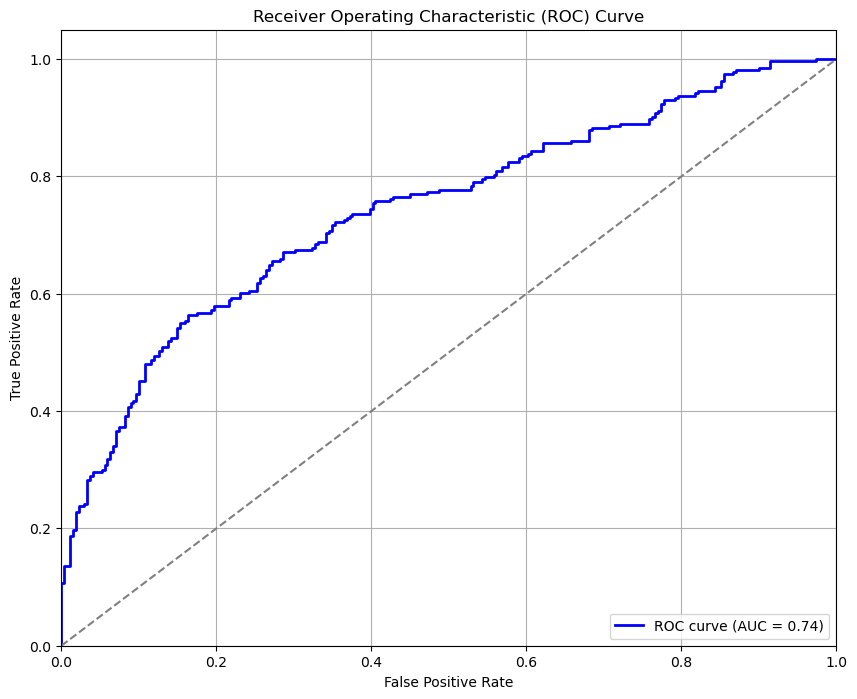

In [164]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

<Figure size 1000x800 with 0 Axes>

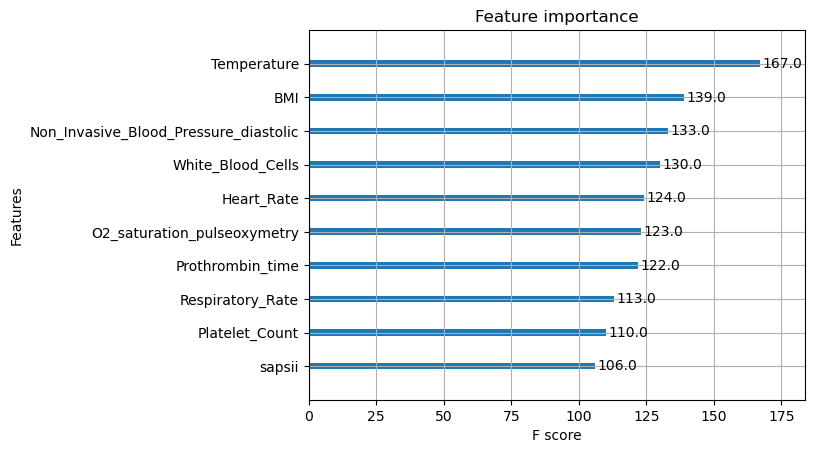

In [165]:
# Plot feature importance
import matplotlib.pyplot as plt
from xgboost import plot_importance

plt.figure(figsize=(10, 8))
plot_importance(model, max_num_features=10)
plt.show()

In [166]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Update classifier with best parameters
model = grid_search.best_estimator_

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.4s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.2s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.2s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.2s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.2s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=1.0; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.2s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.2s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.2s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=0.8; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=1.0; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=1.0; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.2s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.2s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.2s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.3s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.3s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.5s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.3s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.3s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:19] WARNING: /home/conda/feedstock_root/build_ar

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:19] WARNING: /home/conda/feedstock_root/build_ar

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=1.0; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.2s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.2s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.2s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.2s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.8; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=50, subsample=1.0; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.3s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.3s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.2s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.3s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:26] WARNING: /home/conda/feedstock_root/build_ar

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:26] WARNING: /home/conda/feedstock_root/build_ar

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:26] WARNING: /home/conda/feedstock_root/build_ar

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:27] WARNING: /home/conda/feedstock_root/build_ar

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=1.0; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.2s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.2s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.2s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=50, subsample=0.8; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=50, subsample=1.0; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.2s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.2s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:32] WARNING: /home/conda/feedstock_root/build_ar

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.0s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:33] WARNING: /home/conda/feedstock_root/build_ar

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.2s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.2s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=1.0; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.2s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.3s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.2s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.3s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.3s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.2s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=0.8; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=1.0; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=50, subsample=1.0; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.2s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.2s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.2s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.3s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.5s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.7s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   1.0s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   1.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:44] WARNING: /home/conda/feedstock_root/build_ar

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.3s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=1.0; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=50, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.2s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.2s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.2s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.2s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.8; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=50, subsample=1.0; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.3s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.2s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.3s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.0s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:52] WARNING: /home/conda/feedstock_root/build_ar

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:52] WARNING: /home/conda/feedstock_root/build_ar

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:52] WARNING: /home/conda/feedstock_root/build_ar

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=1.0; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:53] WARNING: /home/conda/feedstock_root/build_ar

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.2s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.2s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.2s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=50, subsample=0.8; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=50, subsample=1.0; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.2s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.2s


/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nico/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:26:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}


In [167]:
# Predict the target on the test set for tuned model
y_pred = model.predict(X_test)

In [168]:
# Calculate accuracy for tuned model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print the classification report for detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.6661

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.54      0.62       269
           1       0.64      0.79      0.70       273

    accuracy                           0.67       542
   macro avg       0.68      0.67      0.66       542
weighted avg       0.68      0.67      0.66       542


Confusion Matrix:
[[146 123]
 [ 58 215]]


<Figure size 1000x800 with 0 Axes>

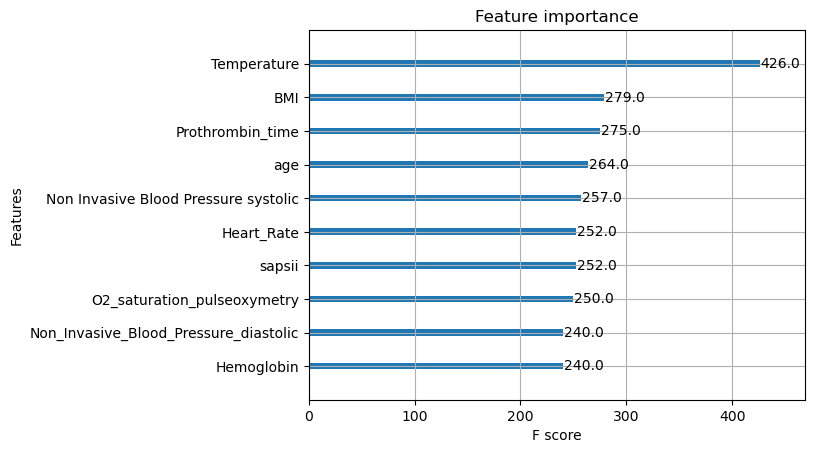

In [170]:
# Plot feature importance for tuned model
plt.figure(figsize=(10, 8))
plot_importance(model, max_num_features=10)
plt.show()

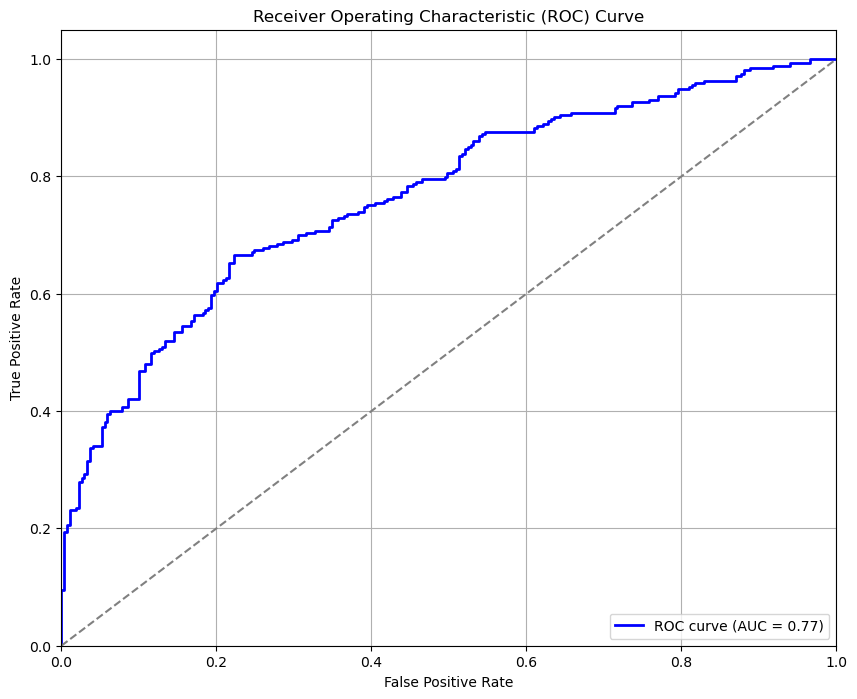

In [169]:
# Predict probabilities for tuned model
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()